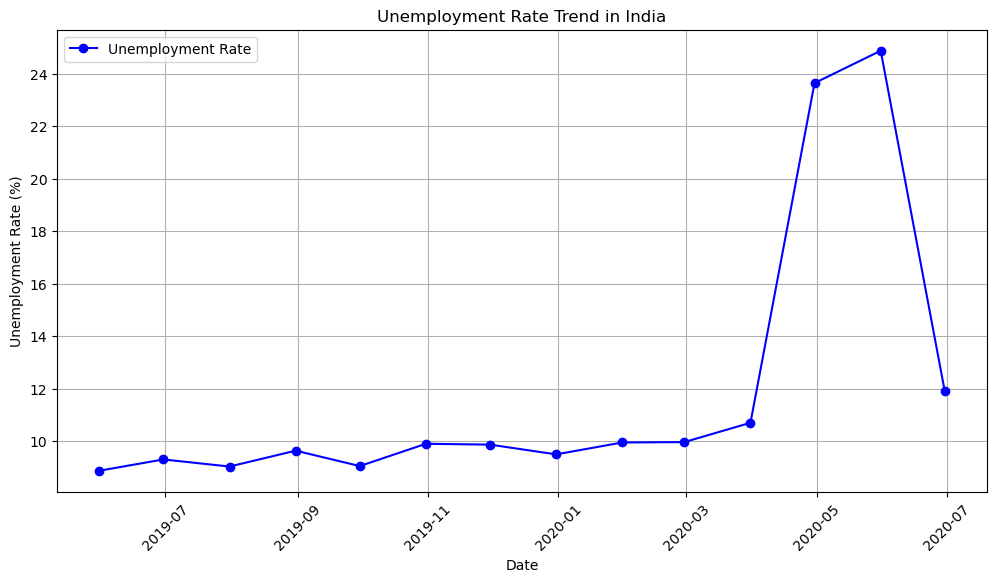

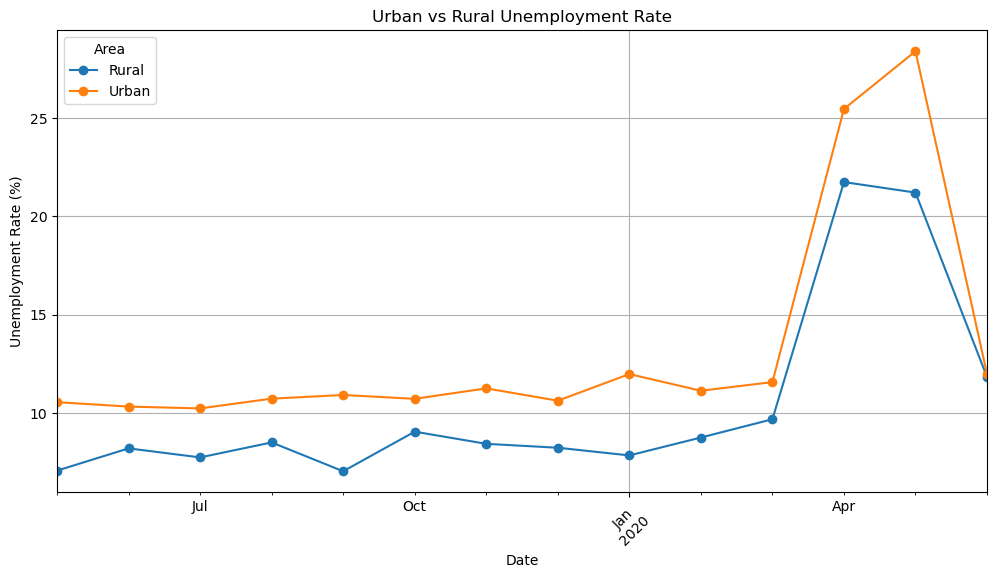

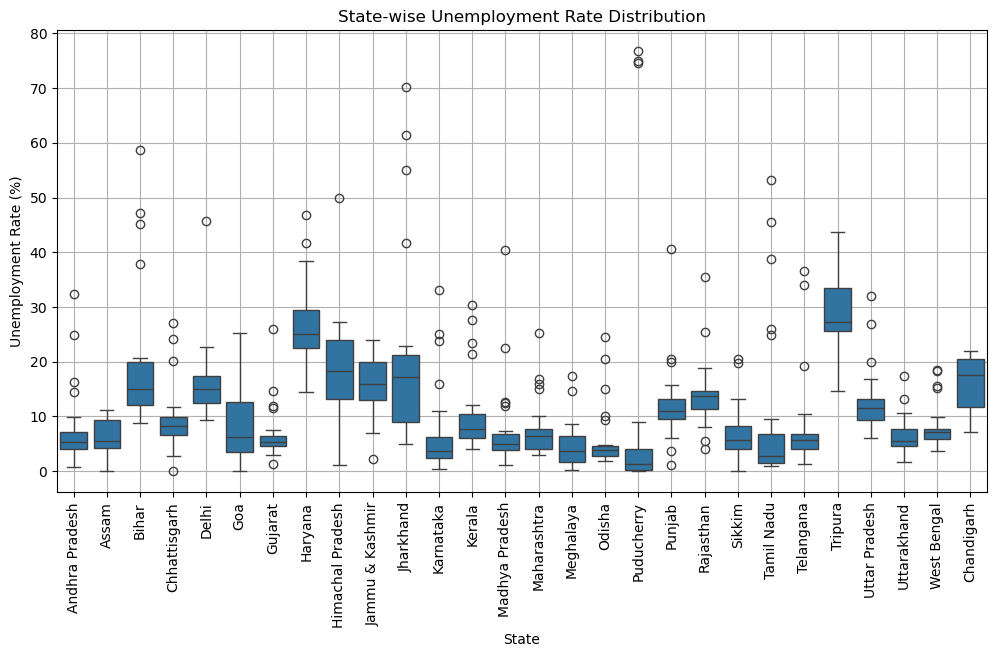

Unemployment Analysis Completed.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "E:/projects/Unemployment in India.csv.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%d-%m-%Y")

# Drop missing values
df = df.dropna()

# Unemployment Trend Over Time
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='b', label="Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend in India")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Urban vs Rural Unemployment
df_area = df.groupby(["Date", "Area"])["Estimated Unemployment Rate (%)"].mean().unstack()
df_area.plot(figsize=(12, 6), marker='o')
plt.title("Urban vs Rural Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.show()

# State-wise Unemployment Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Estimated Unemployment Rate (%)", data=df)
plt.xticks(rotation=90)
plt.title("State-wise Unemployment Rate Distribution")
plt.xlabel("State")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

print("Unemployment Analysis Completed.")